IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERATO

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

d:\GitHub\ProgettoManutenzionePreventiva\M6\NO_FAULT6


VARIABILE RCOU POTENZA MOTORI

In [3]:
pd.set_option('display.max_rows',700)

In [4]:
#andiamo a prendere una potenza media di 1400 per considerare il momento il cui inizia/finisce il volo
rcou_m6 = pd.read_csv("RCOU.csv")
rcou_m6 = rcou_m6.drop(['LineNo','C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8'], axis=1)

rcou_m6 = rcou_m6[((rcou_m6['C9'] >= 1400) & (rcou_m6['C10'] >= 1400) & (rcou_m6['C11'] >= 1400) & (rcou_m6['C12'] >= 1400) & (rcou_m6['C13'] >= 1400) & (rcou_m6['C14']>= 1400))]

display(rcou_m6)

,TimeUS,C9,C10,C11,C12,C13,C14
1668,73694892,1458,1476,1456,1478,1514,1416
1669,73704819,1466,1479,1444,1499,1506,1438
1670,73715417,1448,1507,1453,1502,1492,1464
1671,73726062,1453,1513,1446,1519,1484,1483
1672,73848985,1568,1526,1531,1564,1601,1489
...,...,...,...,...,...,...,...
7775,141083289,1552,1453,1506,1502,1449,1555
7776,141093701,1553,1451,1526,1481,1470,1536
7777,141103895,1567,1434,1507,1500,1465,1540
7778,141114087,1562,1440,1526,1481,1478,1529


In [5]:
#xkf utilizzato per fare poi il confronto con i valori di roll, pitch e yaw in att
xkf1_m6 = pd.read_csv("XKF1_0.csv")
xkf1_m6 = xkf1_m6.drop(['LineNo','C','VN','VE','VD','dPD','PN','PE','PD','GX','GY','GZ','OH'], axis=1)
xkf1_m6 = xkf1_m6[((xkf1_m6['TimeUS'] >= 73694892) & (xkf1_m6['TimeUS'] <= 141125072))]
print(xkf1_m6)

         TimeUS  Roll  Pitch    Yaw
1671   73702936  1.68  -1.47  16.01
1672   73712850  1.69  -1.51  16.01
1673   73723838  1.70  -1.51  16.01
1674   73846519  1.94  -1.55  16.30
1675   73860246  1.91  -1.43  16.37
...         ...   ...    ...    ...
7777  141081079 -2.90   0.22   5.08
7778  141091071 -2.88   0.19   5.13
7779  141101892 -2.85   0.18   5.17
7780  141111938 -2.84   0.13   5.24
7781  141123110 -2.81   0.00   5.31

[6111 rows x 4 columns]


In [6]:
att_m6 = pd.read_csv("ATT.csv")
att_m6 = att_m6.drop(['LineNo','ErrRP', 'ErrYaw', 'AEKF'], axis=1)
att_m6 = att_m6[((att_m6['TimeUS'] >= 73694892) & (att_m6['TimeUS'] <= 141125072))]
print(att_m6)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw
1671   73704076    -0.03  1.68     -0.51  -1.47   18.84  16.01
1672   73714573    -0.05  1.69     -0.50  -1.51   18.84  16.01
1673   73725261    -0.06  1.70     -0.49  -1.51   18.84  16.01
1674   73848283    -0.28  1.94     -0.39  -1.55   18.84  16.30
1675   73861518    -0.32  1.91     -0.39  -1.43   18.84  16.37
...         ...      ...   ...       ...    ...     ...    ...
7777  141082688    -2.22 -2.90      0.22   0.22    7.45   5.08
7778  141092846    -2.22 -2.88      0.23   0.19    7.45   5.13
7779  141103203    -2.22 -2.85      0.23   0.18    7.45   5.17
7780  141113301    -2.22 -2.84      0.23   0.13    7.45   5.24
7781  141124284    -2.22 -2.81      0.24   0.00    7.45   5.31

[6111 rows x 7 columns]


In [7]:
#controllo corrispondenza valori roll, pitch, yaw
att_m6 = pd.merge_asof(att_m6, xkf1_m6, on="TimeUS", by=["Roll","Pitch","Yaw"], tolerance=100000)
print(att_m6)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw
0      73704076    -0.03  1.68     -0.51  -1.47   18.84  16.01
1      73714573    -0.05  1.69     -0.50  -1.51   18.84  16.01
2      73725261    -0.06  1.70     -0.49  -1.51   18.84  16.01
3      73848283    -0.28  1.94     -0.39  -1.55   18.84  16.30
4      73861518    -0.32  1.91     -0.39  -1.43   18.84  16.37
...         ...      ...   ...       ...    ...     ...    ...
6106  141082688    -2.22 -2.90      0.22   0.22    7.45   5.08
6107  141092846    -2.22 -2.88      0.23   0.19    7.45   5.13
6108  141103203    -2.22 -2.85      0.23   0.18    7.45   5.17
6109  141113301    -2.22 -2.84      0.23   0.13    7.45   5.24
6110  141124284    -2.22 -2.81      0.24   0.00    7.45   5.31

[6111 rows x 7 columns]


In [8]:
#elettricita' che scorre nel motore considerato, al momento ne consideriamo solo 1
esc_5_m6 = pd.read_csv("ESC_5.csv")
esc_5_m6 = esc_5_m6.drop(['LineNo','Instance', 'RawRPM', 'Volt', 'Temp', 'CTot', 'MotTemp', 'Err'], axis=1)
esc_5_m6 = esc_5_m6[((esc_5_m6['TimeUS'] >= 73694892) & (esc_5_m6['TimeUS'] <= 141125072))]
print(esc_5_m6)

        TimeUS   RPM  Curr
157   73900907  4948  3.76
158   74112341  5831  4.05
159   74222251  5897  3.67
160   74339425  5864  4.09
161   74439792  6100  4.18
162   74545186  6143  4.28
163   74665171  6237  4.05
164   74762745  6331  4.24
165   74873091  6369  4.11
166   74988458  6191  4.67
167   75096174  6416  5.35
168   75199213  6734  4.81
169   75304834  6622  3.95
170   75420039  6266  4.36
171   75525388  6215  5.14
172   75638799  6540  4.62
173   75853239  6519  4.15
174   75962767  6239  4.04
175   76186826  6211  4.02
176   76401714  6151  3.86
177   76506844  6066  4.07
178   76616040  6169  3.98
179   76826412  6269  3.57
180   76942845  6010  3.75
181   77154090  5990  4.16
182   77255380  6145  4.27
183   77378224  6308  4.32
184   77479745  6269  3.89
185   77583261  6198  3.45
186   77813889  6115  2.80
187   77910713  5794  2.94
188   78026557  5645  2.50
189   78138435  5513  2.62
190   78245161  5359  2.82
191   78353506  5389  2.95
192   78456373  5445  2.89
1

In [9]:
#valori di accelerazione e del giroscopio
imu_2_m6 = pd.read_csv("IMU_2.csv")
imu_2_m6 = imu_2_m6.drop(['LineNo','I', 'EG', 'EA', 'T', 'GH', 'AH', 'GHz', 'AHz'], axis=1)
imu_2_m6 = imu_2_m6[((imu_2_m6['TimeUS'] >= 73694892) & (imu_2_m6['TimeUS'] <= 141125072))]
print(imu_2_m6)

          TimeUS      GyrX      GyrY      GyrZ      AccX      AccY       AccZ
6596    73696909  0.029626 -0.047765 -0.001310 -0.302779  0.123723  -9.573614
6597    73699721  0.076406 -0.050865  0.005088 -0.255804  0.078658  -9.517169
6598    73701240  0.059817 -0.017690  0.011717 -0.190058  0.030802  -9.584750
6599    73703924  0.004336  0.005627  0.008796 -0.119097  0.000081  -9.550622
6600    73706301  0.038264 -0.045034 -0.006716 -0.057506 -0.055751  -9.507314
...          ...       ...       ...       ...       ...       ...        ...
29842  141110997 -0.004738 -0.091020  0.118199 -0.093388  0.518324 -10.182510
29843  141113198  0.005714 -0.078808  0.125033 -0.014485  0.536605 -10.253710
29844  141115717  0.047080 -0.134095  0.121391  0.045315  0.546826 -10.241880
29845  141121793  0.007020 -0.044601  0.091272  0.108041  0.577970 -10.229880
29846  141124177  0.035439 -0.101942  0.082645  0.090929  0.581654 -10.041930

[23251 rows x 7 columns]


In [10]:
#sincronizzazione dei tempi tra att e imu_2
m6_nofault = pd.merge_asof(att_m6, imu_2_m6, on="TimeUS",  tolerance= 100000)
print(m6_nofault)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw      GyrX  \
0      73704076    -0.03  1.68     -0.51  -1.47   18.84  16.01  0.004336   
1      73714573    -0.05  1.69     -0.50  -1.51   18.84  16.01 -0.019993   
2      73725261    -0.06  1.70     -0.49  -1.51   18.84  16.01 -0.030901   
3      73848283    -0.28  1.94     -0.39  -1.55   18.84  16.30  0.031239   
4      73861518    -0.32  1.91     -0.39  -1.43   18.84  16.37  0.005125   
...         ...      ...   ...       ...    ...     ...    ...       ...   
6106  141082688    -2.22 -2.90      0.22   0.22    7.45   5.08 -0.024474   
6107  141092846    -2.22 -2.88      0.23   0.19    7.45   5.13 -0.014584   
6108  141103203    -2.22 -2.85      0.23   0.18    7.45   5.17  0.022830   
6109  141113301    -2.22 -2.84      0.23   0.13    7.45   5.24  0.005714   
6110  141124284    -2.22 -2.81      0.24   0.00    7.45   5.31  0.035439   

          GyrY      GyrZ      AccX      AccY       AccZ  
0     0.005627  0.008796 -0.1

In [11]:
#sincronizzazione dei tempi tra la tabella ottenuta precedentemente e esc_0 (corrente che passa nel motore)
m6_nofault = pd.merge_asof(esc_5_m6, m6_nofault, on="TimeUS",  tolerance= 100000)
print(m6_nofault)

        TimeUS   RPM  Curr  DesRoll   Roll  DesPitch  Pitch  DesYaw     Yaw  \
0     73900907  4948  3.76    -0.42   1.82     -0.39  -1.27   18.84   16.60   
1     74112341  5831  4.05    -1.39   0.06      0.03  -0.36   18.84   19.23   
2     74222251  5897  3.67    -1.76  -0.32      0.46  -0.46   18.83   21.01   
3     74339425  5864  4.09    -1.98  -0.73      0.90  -0.25   18.81   22.88   
4     74439792  6100  4.18    -1.98  -1.03      1.41   0.00   18.79   24.34   
5     74545186  6143  4.28    -1.87  -1.06      1.97   0.21   18.77   26.02   
6     74665171  6237  4.05    -1.74  -1.10      2.98   0.17   18.74   28.10   
7     74762745  6331  4.24    -1.85  -0.91      4.12   0.76   18.71   29.32   
8     74873091  6369  4.11    -2.23  -0.96      5.23   2.22   18.67   29.99   
9     74988458  6191  4.67    -3.00  -1.43      5.51   4.22   17.20   29.85   
10    75096174  6416  5.35    -4.30  -0.69      5.10   5.18   13.57   28.82   
11    75199213  6734  4.81    -5.13  -0.94      4.54

In [12]:
#aggiornamento del tempo ponendo a 0 il momento in cui il volo inizia per noi e settaggio della variabile guasto
m6_nofault["TimeUS"] = m6_nofault["TimeUS"] - m6_nofault.iloc[0]["TimeUS"]
m6_nofault["TimeUS"] = m6_nofault["TimeUS"].astype(int)
m6_nofault["Guasto"] = 0
print(m6_nofault)

       TimeUS   RPM  Curr  DesRoll   Roll  DesPitch  Pitch  DesYaw     Yaw  \
0           0  4948  3.76    -0.42   1.82     -0.39  -1.27   18.84   16.60   
1      211434  5831  4.05    -1.39   0.06      0.03  -0.36   18.84   19.23   
2      321344  5897  3.67    -1.76  -0.32      0.46  -0.46   18.83   21.01   
3      438518  5864  4.09    -1.98  -0.73      0.90  -0.25   18.81   22.88   
4      538885  6100  4.18    -1.98  -1.03      1.41   0.00   18.79   24.34   
5      644279  6143  4.28    -1.87  -1.06      1.97   0.21   18.77   26.02   
6      764264  6237  4.05    -1.74  -1.10      2.98   0.17   18.74   28.10   
7      861838  6331  4.24    -1.85  -0.91      4.12   0.76   18.71   29.32   
8      972184  6369  4.11    -2.23  -0.96      5.23   2.22   18.67   29.99   
9     1087551  6191  4.67    -3.00  -1.43      5.51   4.22   17.20   29.85   
10    1195267  6416  5.35    -4.30  -0.69      5.10   5.18   13.57   28.82   
11    1298306  6734  4.81    -5.13  -0.94      4.54   5.48   11.

In [13]:
path_file = path_file.replace(r"M6\NO_FAULT6", "")
os.chdir(path_file)
m6_nofault.to_csv('m6_nofault.csv', index=False)
print(path_file)

d:\GitHub\ProgettoManutenzionePreventiva\


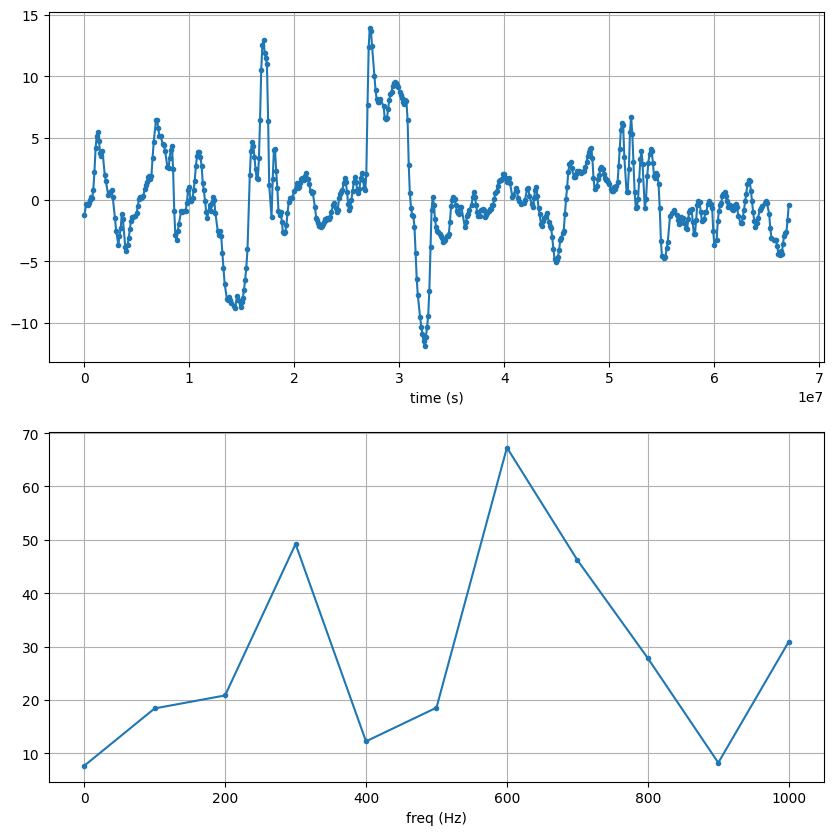

In [14]:
t = m6_nofault["TimeUS"]
y = m6_nofault["Pitch"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

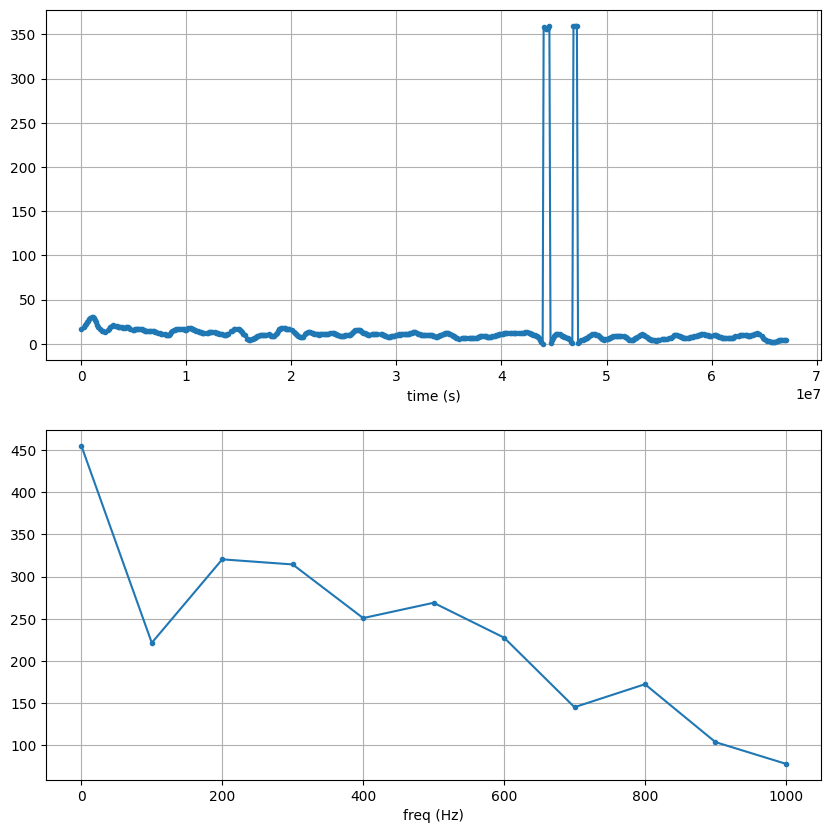

In [15]:
t = m6_nofault["TimeUS"]
y = m6_nofault["Yaw"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

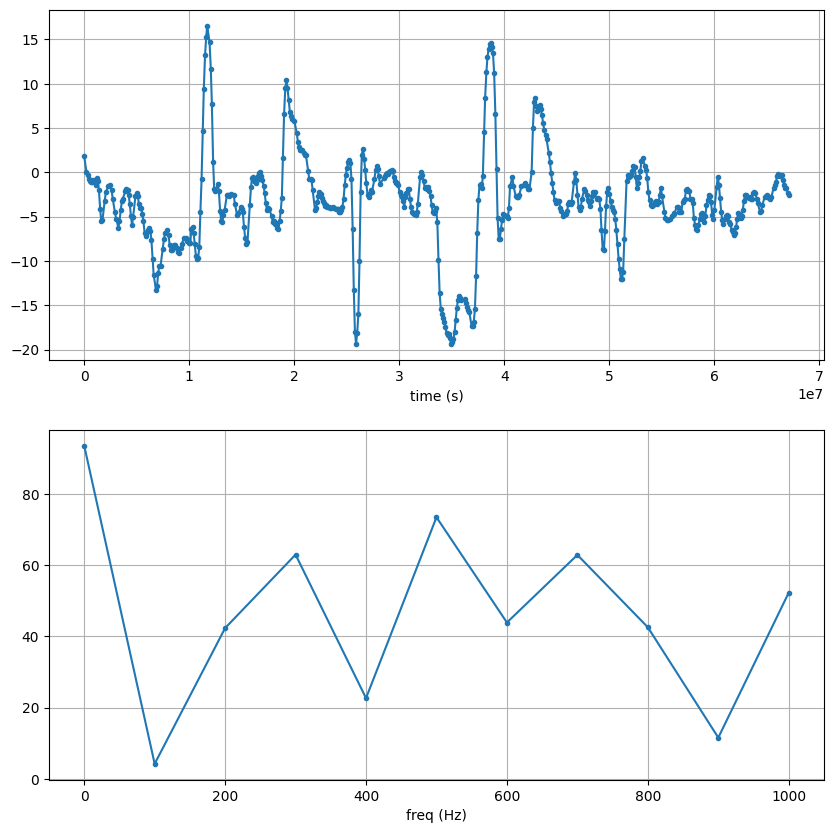

In [16]:
t = m6_nofault["TimeUS"]
y = m6_nofault["Roll"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

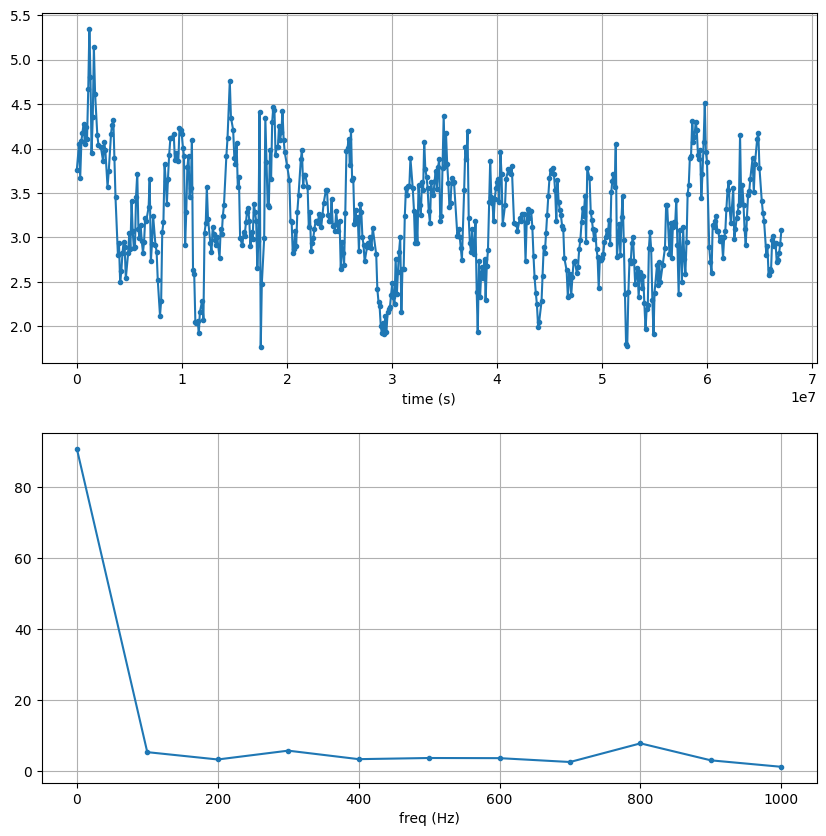

In [17]:
t = m6_nofault["TimeUS"]
y = m6_nofault["Curr"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

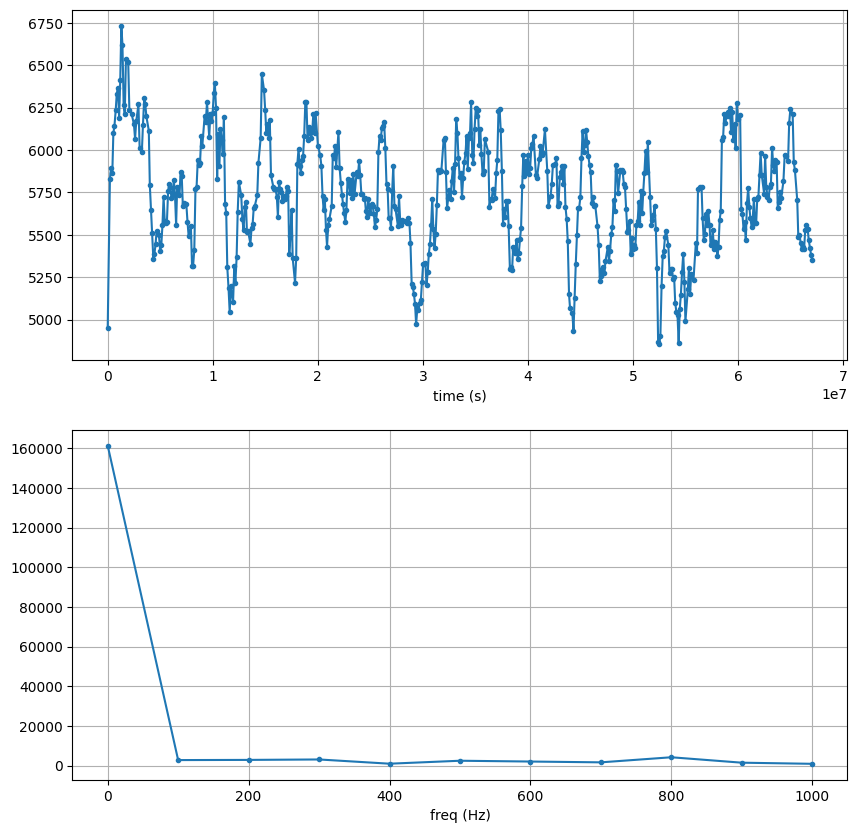

In [18]:
t = m6_nofault["TimeUS"]
y = m6_nofault["RPM"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

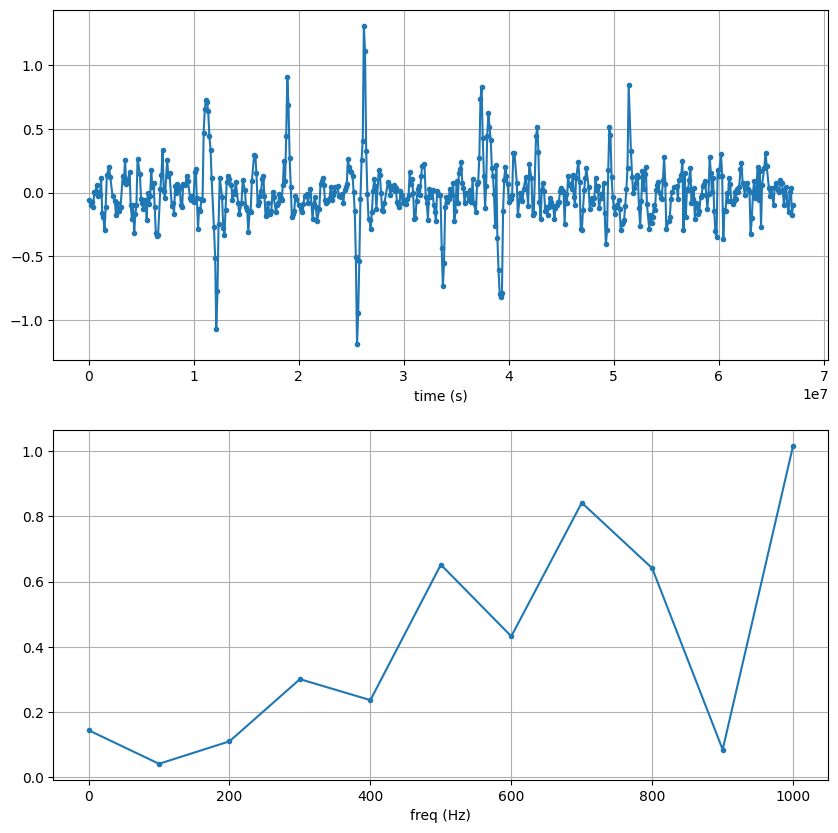

In [19]:
t = m6_nofault["TimeUS"]
y = m6_nofault["GyrX"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

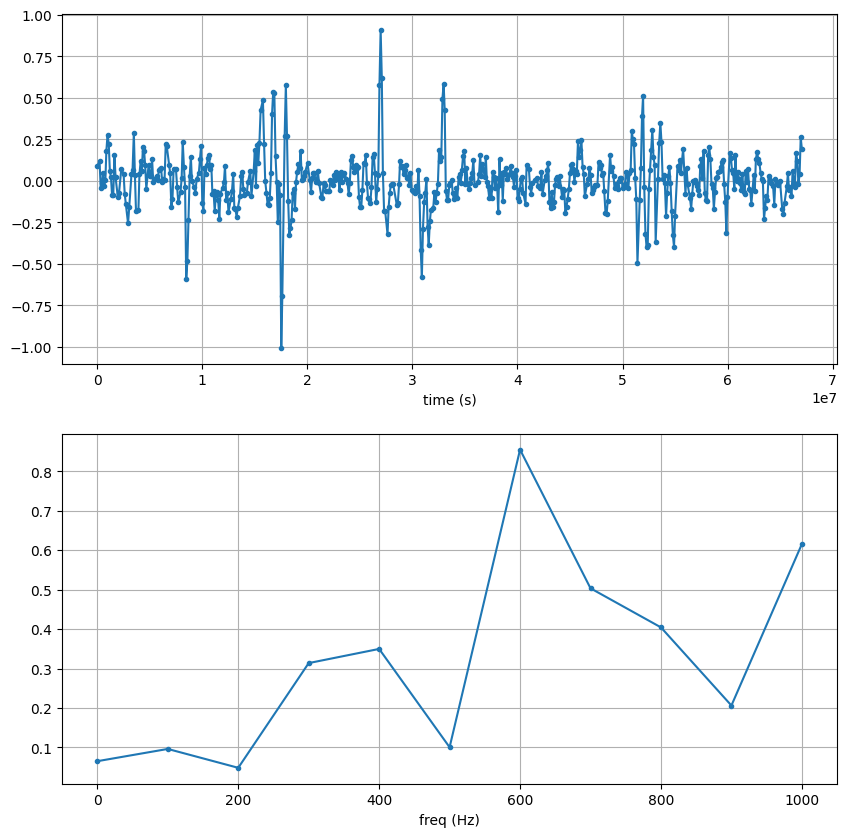

In [20]:
t = m6_nofault["TimeUS"]
y = m6_nofault["GyrY"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

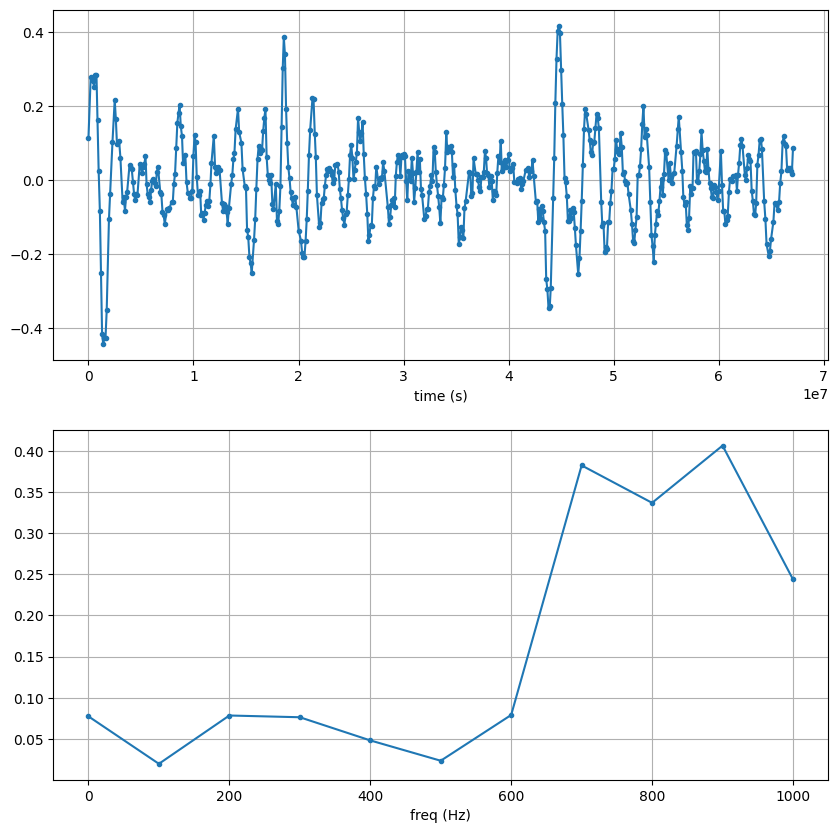

In [21]:
t = m6_nofault["TimeUS"]
y = m6_nofault["GyrZ"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

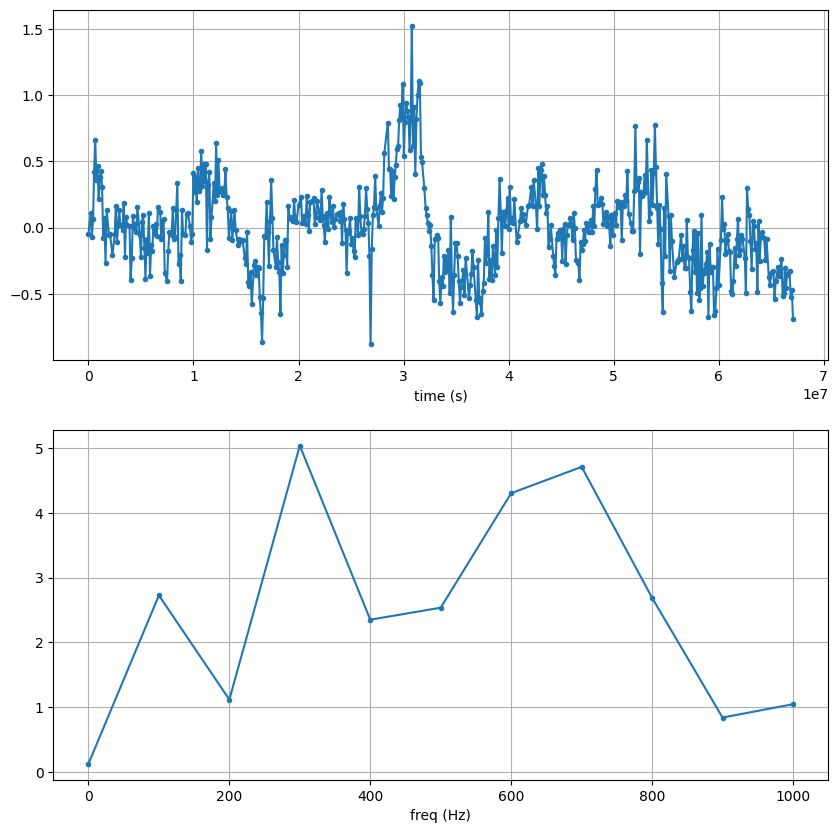

In [22]:
t = m6_nofault["TimeUS"]
y = m6_nofault["AccX"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

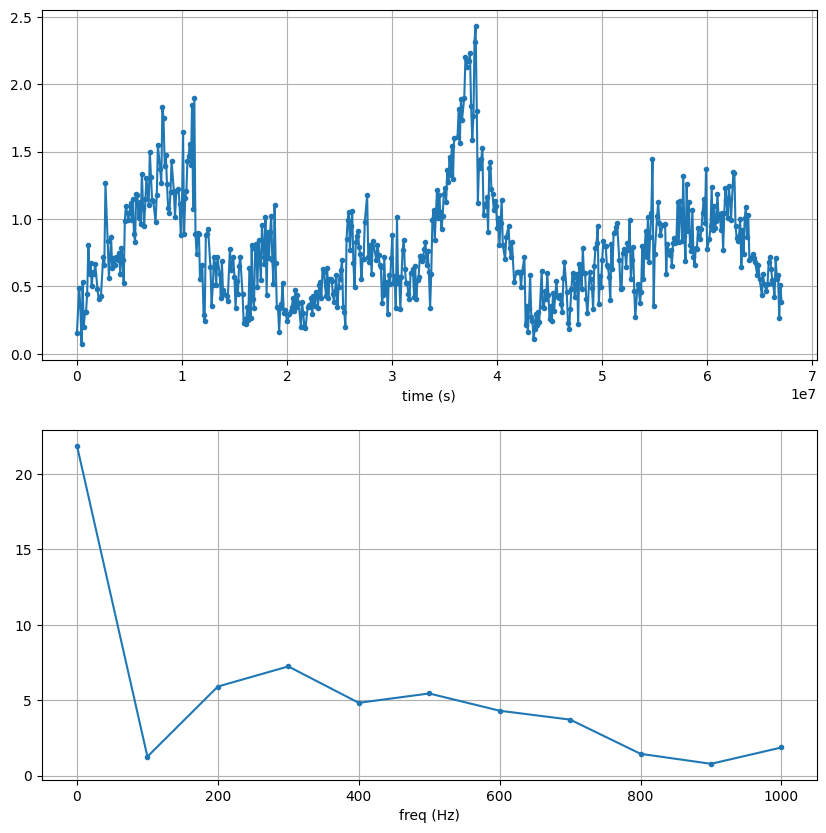

In [23]:
t = m6_nofault["TimeUS"]
y = m6_nofault["AccY"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

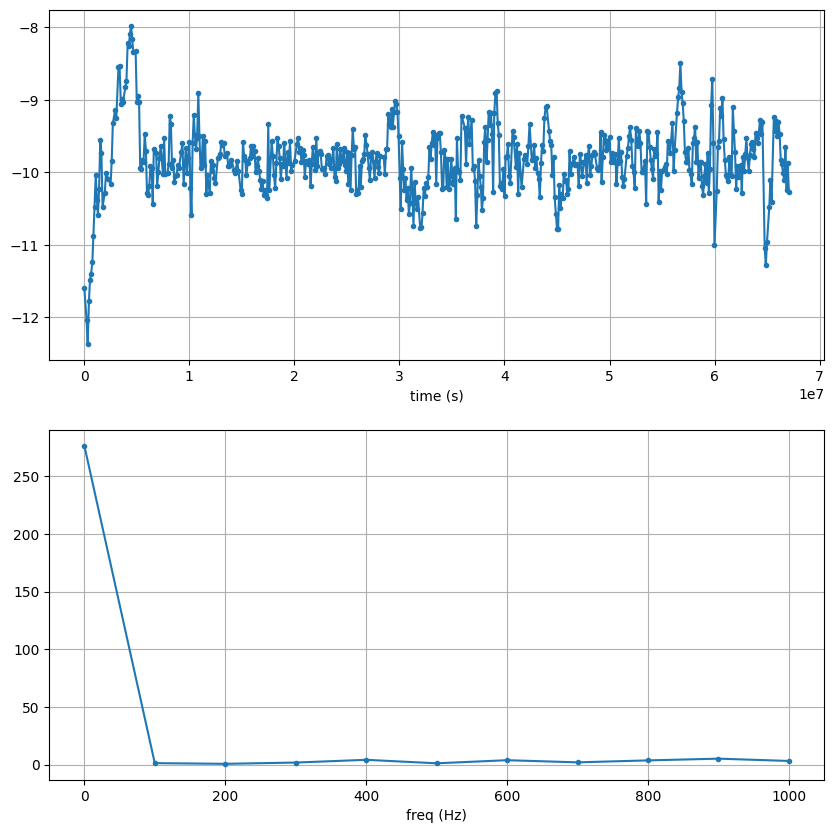

In [24]:
t = m6_nofault["TimeUS"]
y = m6_nofault["AccZ"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()